In [34]:
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
stations_list = pd.read_excel("All Stations.xlsx")

In [36]:
stations_list = pd.read_excel("All Stations.xlsx")
index_to_station_name = {}
station_name_to_index = {}
for i,station in enumerate(stations_list['Station']):
    index_to_station_name[i] = station
    station_name_to_index[station] = i

In [3]:
def line_matrix_to_adjacency_matrix(line_matrix):
    adjacency_matrix = np.zeros((507,507))
    
    for edge in line_matrix:
        adjacency_matrix[edge[0]][edge[1]] = edge[2]
        if edge[3] == 0:
            adjacency_matrix[edge[1]][edge[0]] = edge[2]
            
    return adjacency_matrix

In [4]:
network_mat = np.empty((2, 4))
for filename in os.listdir("Line Matrices"):
    file = os.path.join("Line Matrices", filename)
    if file != "Line Matrices/.noteablekeep":
        line_mat = np.load(file)
        network_mat = np.concatenate((network_mat,line_mat), axis=0)
        network_mat = network_mat.astype(int)

In [30]:
network_mat = np.load("Line Matrices\Tram Matrix.npy")
network_mat = network_mat.astype(int)

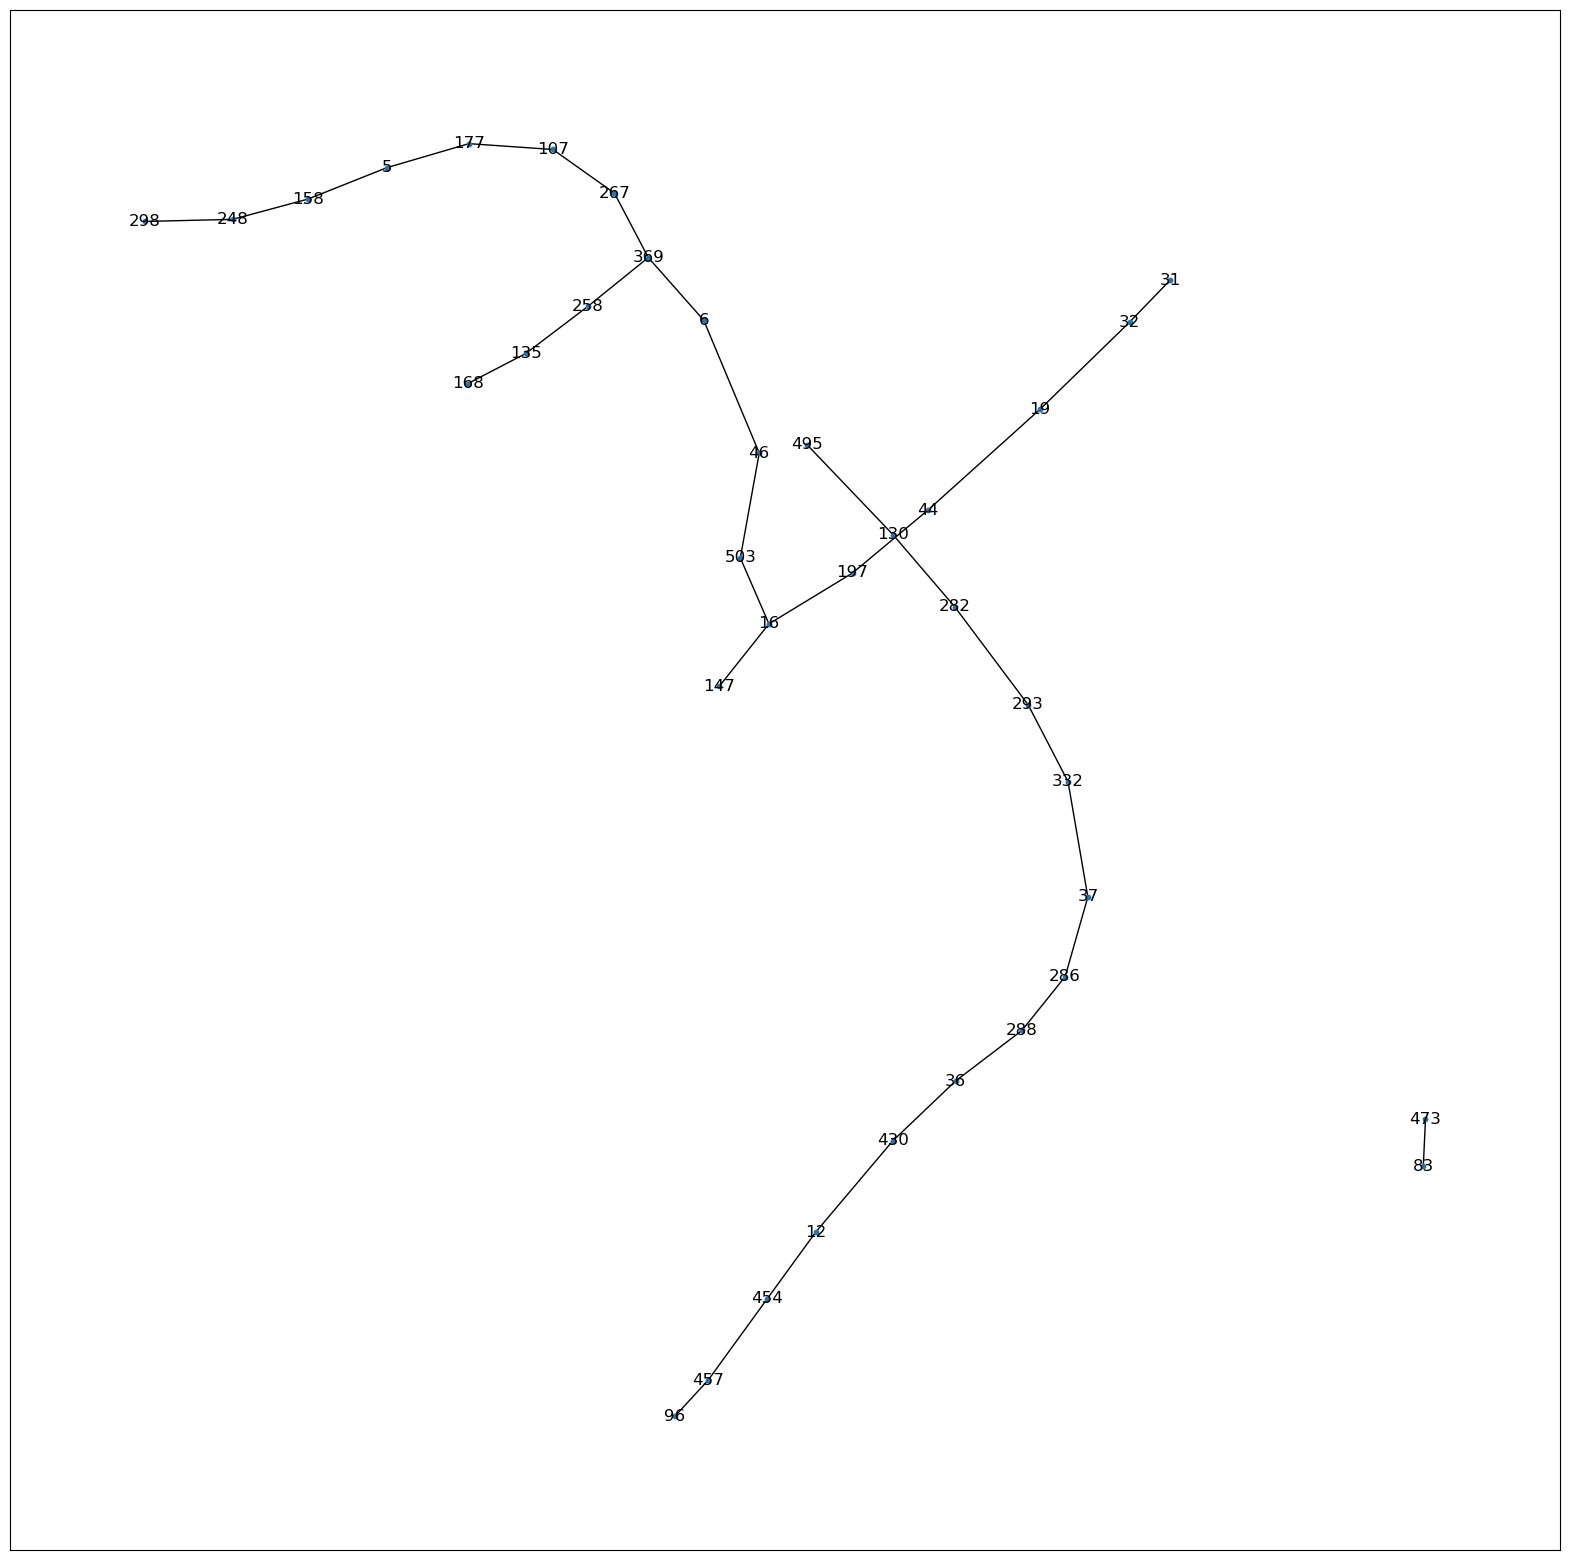

In [37]:
G = nx.from_numpy_matrix(line_matrix_to_adjacency_matrix(network_mat), create_using = nx.MultiGraph())
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)
fig = plt.figure(figsize=(20,20))
nx.draw_networkx(G,
                  with_labels=True,
                  node_size=10,
                  arrowstyle='-|>')
plt.show()

In [38]:
index_to_station_name[473]

'West Croydon'

In [39]:
index_to_station_name[83]

'Centrale'